## EDA for Hours Spent on Labs Survey

In [2]:
suppressPackageStartupMessages(library(tidyverse))
options(warn=-1)

This analysis will investigate the following question:

*How does the number of times a Master of Data Science (MDS) student goes to office hours affect the average number of hours they spend working on labs per week?*

based on the results collected from this [survey](https://ubc-mds.slack.com/archives/C24HU8X0W/p1554330074049900). We stored our raw data in this [repo]().

In [3]:
# Load survey data
rawdata = suppressMessages(read_csv("Hours_Spent_On_Labs_Survey_Final.csv"))

In [4]:
# Data cleaning
raw_df = data.frame(rawdata)
row_to_remove = c(1:2)
col_to_remove = c(1:19, 21, 25, 30, 31)
df = raw_df[-row_to_remove, -col_to_remove]
names(df) <- c("attend_OH", "lab_hours", "group", "academic", "yrs_out_school", "program", "stat", "optional")
df <- df %>% mutate(group = as.factor(group), academic = as.factor(academic), yrs_out_school= as.integer(yrs_out_school)) %>% select (lab_hours, everything())


In [4]:
head(df)

lab_hours,attend_OH,group,academic,yrs_out_school,program,stat,optional
20,0,Mostly alone,Engineering,0,3,2,3
20,2,Mostly alone,Science,0,3,3,4
15,0,Mostly alone,Business,2,4,2,1
19,4,Mostly in groups,Math,6,3,3,1
20,0,Mostly alone,Engineering,0,4,3,1
30,5,Mostly in groups,Math,6,2,2,3


### Variables description 

- **lab_hours**: Average number of hours spent working on labs per week (hours)

- **attend_OH**: Number of times a student attends office hours per week (integer)

- **group**: Work style 'mostly in groups' or 'mostly alone'

- **academic**: Academic background (Engineering, Science, Business, Math, Other)

- **yrs_out_school**: Number of years a student has been out-of-school (To the nearest year)

- **program**: Programming skills, from 1(low) to 5(high)

- **stat**: Statistical skills, from 1(low) to 5(high)

- **optional**: How frequently a student does optional questions, 1(never), 5(always)

### Summary Table

In [15]:
summary(df)

  lab_hours          attend_OH                      group           academic 
 Length:56          Length:56          Mostly alone    :38   Business   : 8  
 Class :character   Class :character   Mostly in groups:18   Engineering:15  
 Mode  :character   Mode  :character                         Math       :14  
                                                             Other      : 4  
                                                             Science    :15  
                                                                             
 yrs_out_school     program              stat             optional        
 Min.   : 0.000   Length:56          Length:56          Length:56         
 1st Qu.: 0.750   Class :character   Class :character   Class :character  
 Median : 2.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 3.375                                                           
 3rd Qu.: 5.000                                                           
 Max

###  I- Exploring the distribution of explanatory variables

In [5]:
# Gathering the data to be able to facet on all variables
df["out_of_school"]= sprintf('%02d',as.numeric(df[['yrs_out_school']]))

df2 <- df %>% select("attend_OH","group","academic","program","stat","optional","out_of_school")  %>% 
    drop_na()  %>% 
    gather(variable,value) %>%
    group_by(variable, value) %>% 
    summarize(Count=n())

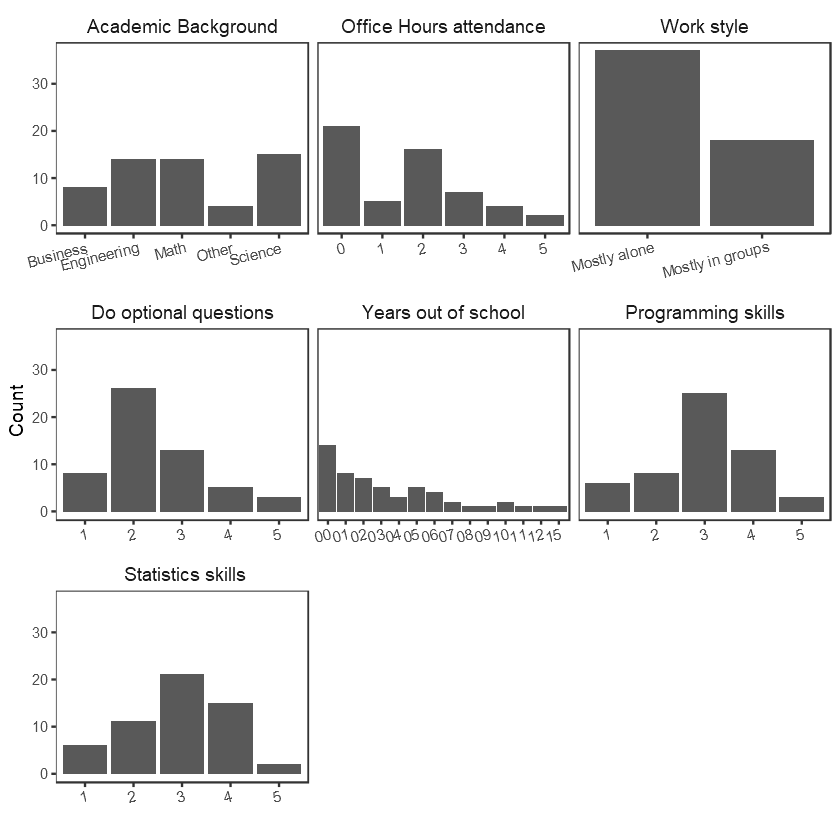

In [6]:
#Plots
labels<- c(
    `academic`="Academic Background",
    `attend_OH`="Office Hours attendance",
    `group`="Work style",
    `optional`="Do optional questions",
    `program`= "Programming skills",
    `stat`=" Statistics skills",
    `out_of_school`= "Years out of school"
    
  )

ggplot(df2,aes(x=value, y=Count))+ 
        geom_bar( stat="identity")+
        facet_wrap(~variable, scales="free_x", labeller=as_labeller(labels))+
        theme_bw()+ 
        theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11),
            axis.text.x = element_text(angle = 14, hjust = 1))+
        xlab("")+
        ylab("Count")

### Observations:
- Most students' academic background is in Engineering, Math and science. 
- There are more sudents who mostly work alone than students who mostly work in groups.
- Most students assessed their programming and statistical skills as average
- The majority of students do not attend office hours. The next big group is those that attend office hours 2 times per week on average
- Most students did not work after their undergraduate degree. The longest a participant has been out of school is 15 years, followed by 12 and 11 years.

### II- Exploring relationship between variables

#### 1- Attending office hours and average number of hours spent on lab

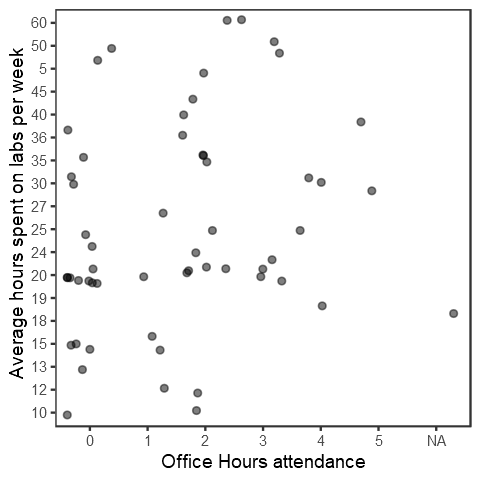

In [14]:
#options(repr.plot.width = 4, repr.plot.height = 4)
df %>% 
ggplot(aes(attend_OH, lab_hours)) +
    geom_jitter(alpha=0.5) +
    theme_bw()+
    theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11))+
labs(x="Office Hours attendance", y="Average hours spent on labs per week")

#### Observation:  

 Average hours spent on labs per week does not seem to be related to office hours attendance

#### 2- Facetting by potential confounding variables

> a- **Working style and optional questions**

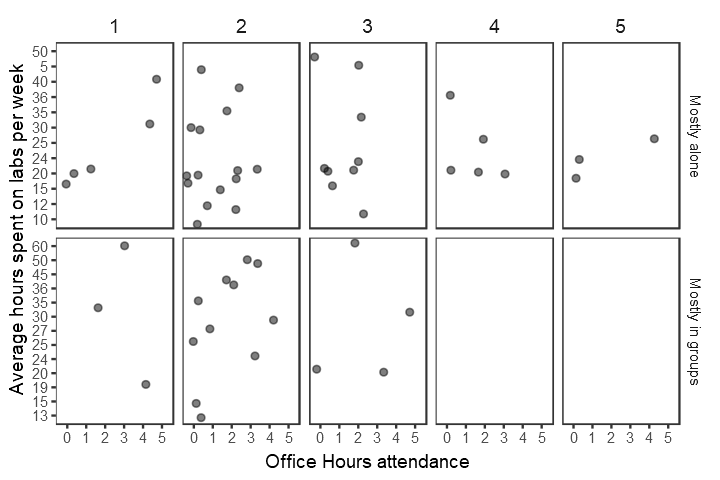

In [13]:
#options(repr.plot.width = 6, repr.plot.height = 4)
df %>% 
drop_na()  %>% 
ggplot(aes(attend_OH, lab_hours)) +
    facet_grid(.~group~optional,scales="free_y") +
    geom_jitter(alpha=0.5) +
    theme_bw()+
    theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11))+
labs(x="Office Hours attendance", y="Average hours spent on labs per week")

#### Observations: xxxxxxxx

> b- **Academic background**

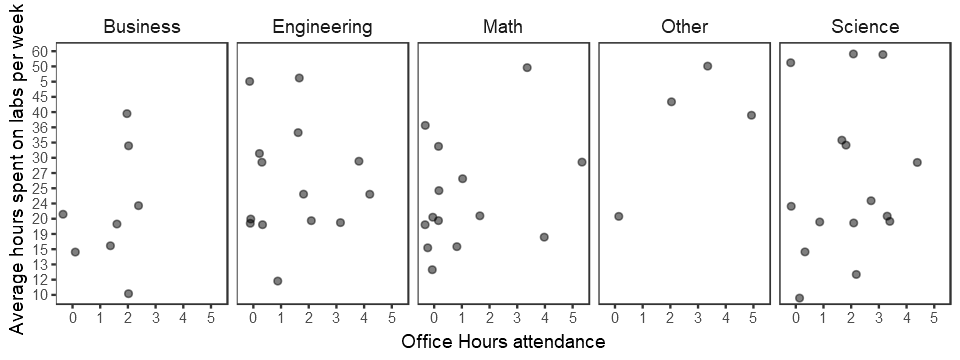

In [12]:
#options(repr.plot.width = 8, repr.plot.height = 3)
df %>% 
drop_na()  %>% 
ggplot(aes(attend_OH, lab_hours)) +
    facet_grid(.~academic,scales="free_y") +
    geom_jitter(alpha=0.5) +
    theme_bw()+
    theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11))+
labs(x="Office Hours attendance", y="Average hours spent on labs per week")

#### Observations: xxxxxxxx

>c- ** Programming and statistical skills**

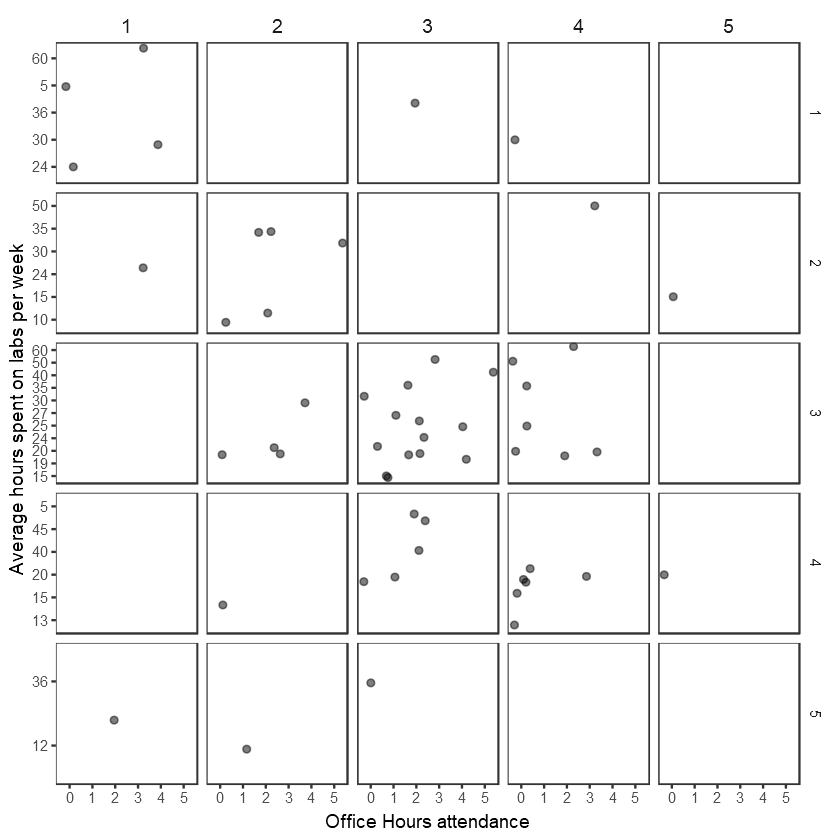

In [7]:
df %>% 
drop_na()  %>% 
ggplot(aes(attend_OH, lab_hours)) +
    facet_grid(.~program~stat,scales="free_y") +
    geom_jitter(alpha=0.5) +
    theme_bw()+
    theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11))+
labs(x="Office Hours attendance", y="Average hours spent on labs per week")

#### Observations: xxxxxxxx

> d- ** Number of years of of school**

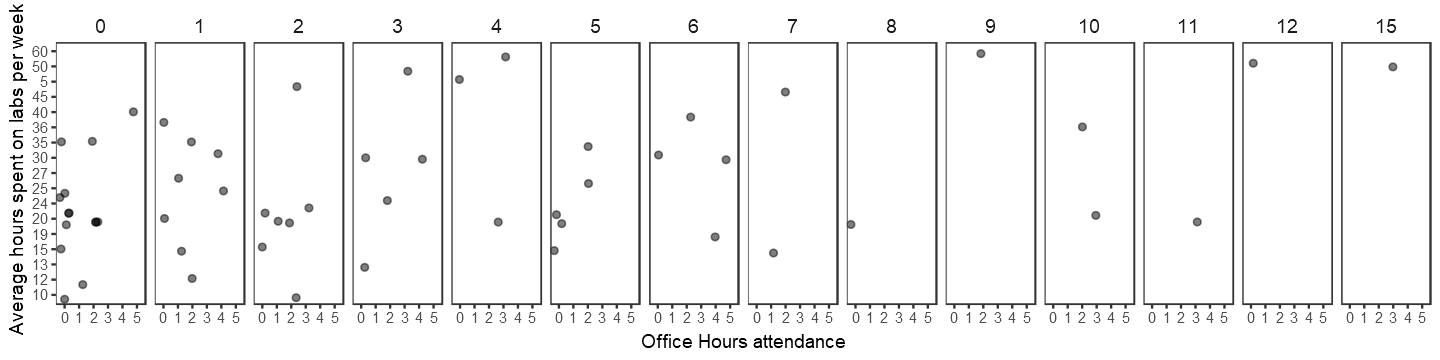

In [8]:
#options(repr.plot.width = 12, repr.plot.height = 3)
df %>% 
drop_na() %>% 
ggplot(aes(attend_OH, lab_hours)) +
    facet_grid(.~yrs_out_school,scales="free_y") +
    geom_jitter(alpha=0.5) +
    theme_bw()+
    theme(panel.grid.major=element_blank(), 
            panel.grid.minor=element_blank(),
            strip.background=element_blank(), 
            strip.text.x=element_text(size=11))+
labs(x="Office Hours attendance", y="Average hours spent on labs per week")

#### Observations: xxxxxxxx

### III- Conclusion